In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## The birthday problem 

Given a number of people, **n**, in a room, what is the probability that at least two share a birthday?

Assumptions for the simplest case (**discuss**):

a. 365 days in a year.

b. All days are equally likely.

c. Subjects have independent birthdays.

<br>

We showed that, for $2\leq n\leq 365$, the probability is equal to 

$$P(n)=1-\frac{365}{365}\times\frac{364}{365}\times\frac{363}{365}\times ...\times \frac{(365-n+1)}{365}=
1-\frac{365\times364\times ...\times (365-n+1)}{365^n}$$

We first calculate these probabilities for a range of n's. Which formula should we use?

In [3]:
# n=50
# how many digits?
365**50

130209665378201810951206252252283823482173250668534691269518567229718205926569936092665807980583991820822120644152164459228515625

In [4]:
# recall the arange function in numpy - we'll use it below
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
# a function that calculates the probability for 1<n<365
def birthday_prob(n):
    """Calculates the probability that at least 2 people out of n have the same birthday"""
    prob=1
    for i in np.arange(n):
        prob = prob * (365-i)/365
    return 1-prob


In [6]:
birthday_prob(50)

0.9703735795779884

In [7]:
# Construct a data frame with the probabilities for a range of n's
number_people=np.arange(2,101,1)
probs= np.array([]) # an empty array
for i in number_people: probs= np.append(probs,birthday_prob(i))

Birthday_df=pd.DataFrame(
    {"Number of people":number_people,
     "Probability":probs})
Birthday_df

,Number of people,Probability
0,2,0.002740
1,3,0.008204
2,4,0.016356
3,5,0.027136
4,6,0.040462
...,...,...
94,96,0.999999
95,97,0.999999
96,98,0.999999
97,99,1.000000


<AxesSubplot:xlabel='Number of people'>

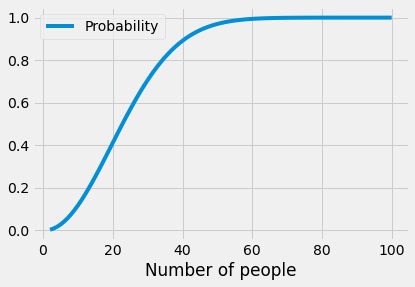

In [8]:
Birthday_df.plot("Number of people","Probability")

<AxesSubplot:xlabel='Number of people'>

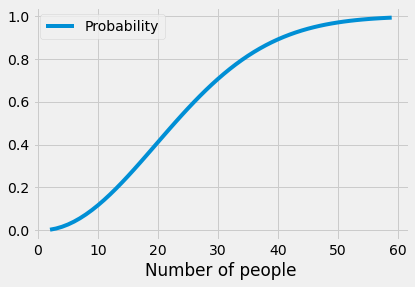

In [9]:
# Restricting the range for better visualization
Birthday_df[Birthday_df["Number of people"]<60].plot("Number of people","Probability")

Are the above probabilities surprising? Can you provide an intuition for them?


## A computational (simulation based) solution to the birthday problem

**Simulation goal: use the computer to mimic a physical experiment.**

Steps in a simulation:
- What to simulate;
- Simulate one instance;
- Decide on the number of repetitions;
- Code and summarize the results of simulations.

Two important issues:
- Simulations will give us an estimate/approximation of the probability we are interested in; more repetitions, better the approximation.
- The number of repetitions is important and strategies for selecting them will be discussed in more detail later in the course when we talk about the binomial distribution.

### Before starting to program (or reading/running the code below), think about a plan for how to simulate 


In [10]:
# one simulation
birthdays=np.arange(1,366,1)
n=50
one_run=np.random.choice(birthdays,n)
one_run

array([289, 222, 331, 281, 153, 143,  66, 355, 329,  28, 296,  46, 176,
       351, 124,  83, 251,  15, 200, 278, 221, 111, 176, 300, 231, 260,
       113, 325, 348, 207, 258, 137, 317, 253,  98, 225, 128,  92, 249,
       136, 130, 204, 173, 262,  10, 115, 173,  50, 290, 165])

In [11]:
# Are there dupicates?
# numpy has built-in sorting function
np.sort(one_run)

array([ 10,  15,  28,  46,  50,  66,  83,  92,  98, 111, 113, 115, 124,
       128, 130, 136, 137, 143, 153, 165, 173, 173, 176, 176, 200, 204,
       207, 221, 222, 225, 231, 249, 251, 253, 258, 260, 262, 278, 281,
       289, 290, 296, 300, 317, 325, 329, 331, 348, 351, 355])

I need a function that will give me the number of occurences of the most frequent day. There are many ways to do it:
-  use the `Counter` function we saw in Lecture 2
-  numpy has a useful function called `bincount`
-  write your own function - how would you do it?

We will use `bincount`

In [12]:
# a reminder on how to use Counter (might skip in class)
from collections import Counter
Counter([2,2,2,1,7])

Counter({2: 3, 1: 1, 7: 1})

In [13]:
Counter(one_run)

Counter({289: 1,
         222: 1,
         331: 1,
         281: 1,
         153: 1,
         143: 1,
         66: 1,
         355: 1,
         329: 1,
         28: 1,
         296: 1,
         46: 1,
         176: 2,
         351: 1,
         124: 1,
         83: 1,
         251: 1,
         15: 1,
         200: 1,
         278: 1,
         221: 1,
         111: 1,
         300: 1,
         231: 1,
         260: 1,
         113: 1,
         325: 1,
         348: 1,
         207: 1,
         258: 1,
         137: 1,
         317: 1,
         253: 1,
         98: 1,
         225: 1,
         128: 1,
         92: 1,
         249: 1,
         136: 1,
         130: 1,
         204: 1,
         173: 2,
         262: 1,
         10: 1,
         115: 1,
         50: 1,
         290: 1,
         165: 1})

In [14]:
Counter([2,2,2,1,7]).most_common(1)

[(2, 3)]

In [15]:
Counter([2,2,2,1,7]).most_common(1)[0][1]

3

In [16]:
# the function bincount provides counts for all integers from 0 to the largest
np.bincount([2,2,2,1,7])

array([0, 1, 3, 0, 0, 0, 0, 1], dtype=int64)

In [17]:
np.max(np.bincount([2,2,2,1,7]))

3

In [18]:
# we now create a function that will simulate nsim simulations of the 
# birthday problem for n subjects
def birthday_sim(n,nsim):
    outcomes = np.array([])
    for i in np.arange(nsim):
        outcomes = np.append(outcomes, np.max(np.bincount(np.random.choice(birthdays,n))))
    return outcomes


In [19]:
birthday_sim(23,100)

array([1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2.,
       2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 3., 1., 2., 1., 2., 2.,
       2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2.,
       3., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2.,
       2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2.,
       1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1.])

In [20]:
# calculate the probability; how many simulations should we run?
n=23
nsim=1000
sum(birthday_sim(n,nsim)>1)/nsim

0.522


# Classroom discussion

We introduced a simple example where we can solve a problem analytically/mathematically and computationally (using simulations).

**Questions:**
- Are the assumptions made in the simulations we run the same or different than the ones we made in the derivation?
- Give other examples of problems (in science, finance etc.) that can be approached using both mathematics and computation. If you do not know any, give examples of problems where simulations or mathematics play an important role.
- What are the advantages and disadvantages of using mathematical approaches? What are the advantages and disadvantages of using computational approaches (simulations)?

<br>
<br>


## Mathematical derivation versus computational (simulation-based) estimation


**The triplet birthday problem:** Given a number of people in a room, what is the probability that at least three share a birthday?

Assumptions same as before:

a. 365 days in a year.

b. All days are equally likely.

c. Subjects have independent birthdays.

Can you derive an exact formula for this probability?


In [21]:
# We can answer the "triplets" question as easily
nsim=1000
number_people=np.arange(3,50,1)
probs3= np.array([])
for i in number_people: probs3= np.append(probs3,sum(birthday_sim(i,nsim)>2)/nsim)

Birthday3_df=pd.DataFrame(
    {"Number of people":number_people,
     "Triplet Probability":probs3})
Birthday3_df


,Number of people,Triplet Probability
0,3,0.000
1,4,0.000
2,5,0.000
3,6,0.000
4,7,0.001
5,8,0.000
6,9,0.000
7,10,0.000
8,11,0.001
9,12,0.000


<AxesSubplot:xlabel='Number of people'>

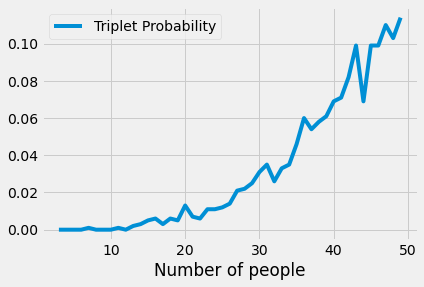

In [22]:
Birthday3_df.plot("Number of people","Triplet Probability")

If you want to obtain a smoother curve (reflecting a more accurate estimation of probabilities) you need to increase the number of simulations. Play with the code and see how the number of simulations affects the smoothness of the function!

In [23]:
n=87
nsim=10000
sum(birthday_sim(n,nsim)>2)/nsim

0.5081

## Can we calculate these probabilities more accurately?

Note that not all days of the year are equally likely to be birthdays. Born in September?

http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/

The visualization in the link above is based on a dataset from FiveThirtyEight github:

https://github.com/fivethirtyeight/data/tree/master/births

Note that in the folowing dataset, the variable for day of week is coded 1 for Monday and 7 for Sunday.


In [24]:
birth_data=pd.read_csv("https://github.com/fivethirtyeight/data/blob/master/births/US_births_2000-2014_SSA.csv")
print(birth_data.shape)
birth_data.head(10)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 28, saw 367


**Some interesting observations from the data**

The pandas environment has commands that allow you to group rows by unique values in a column. We used it before and we will use it below. You will learn more about it in Lecture 10 (groups, joins, database operations).

In [ ]:
# not surprising (and also not relevant for our calculation) day of the week matters
birth_data.groupby('day_of_week').sum()[['births']]

In [ ]:
# another irrelevant (but fun) data grouping: is 13th avoided? 
birth_data.groupby('date_of_month').sum()[['births']]

In [ ]:
counts_df=birth_data.groupby(['month','date_of_month']).sum()[['births']]
counts_df.head(10)

In [ ]:
# the default histogram from Table is not very informative
counts_df.hist("births");

In [ ]:
counts_df.hist("births",bins = np.arange(116000, 195000, 2000));

In [ ]:
# the inferred probabilities of each day of the year 
day_probs=counts_df.births/sum(counts_df.births)
# January probabilities
day_probs[:31]

In [ ]:
# we can draw with specified probabilities
np.random.choice(["H","T"],10,p=[0.8,0.2])

In [ ]:
# add February 29 - the number of possible birthdays is now 366
birthdays2=np.arange(1,367,1)

# we now create a function that will simulate nsim simulations of the 
# birthday problem for n subjects with days weighted by their probabilities
def birthday_sim2(n,nsim,pr):
    outcomes = np.array([])
    for i in np.arange(nsim):
        outcomes = np.append(outcomes, np.max(np.bincount(np.random.choice(birthdays2,n,p=pr))))
    return outcomes

In [ ]:
# calculate the probability for n=23 
# before running the code below: do you think it is smaller or bigger than 0.5073 (the one we calculated above)
n=23
nsim=100000
sum(birthday_sim2(n,nsim,day_probs)>1)/nsim

### Some conclusions:
- In some situations math offers the best path (for example, lottery winning probabilities); 
    - for example, in Mega Millions players pick six numbers from two separate pools of numbers - five different numbers from 1 to 70, and one number from 1 to 25. Probability of winning?
- In some situations, exact calculations are very difficult (triplet birthdays);
- Often, it is easy to modify simulations to account for changed assumptions (for example, all days equally likely, leap years);
- More accurate calculations or simulations do not always lead to different results - but we might not know that before doing them.

Final note on the triplet problem - this is a reference for the exact calculation (for math majors):
https://www.sciencedirect.com/science/article/pii/S0378375804002721


In [ ]:
# in case we need factorials for board calculations
from math import factorial
factorial(70)